In [4]:
import pandas as pd
import numpy as np

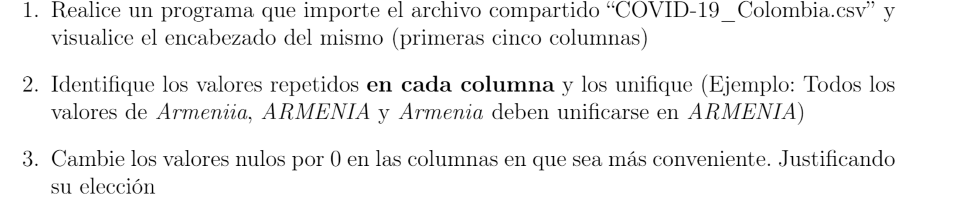

In [119]:
df = pd.read_csv('Casos_positivos_de_COVID-19_en_Colombia._20231031.csv', low_memory=False) #el low memory es para quitar una advertencia sobre los datos 
 #solo quiero los encabezados de las 5 1eras columnas 
df.iloc[:,[0,1,2,3,4]].head(0)    

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento


In [6]:
df.columns  #empecemos mirando el dataset, para saber a grandes rasgos sus componentes 
df.head(300)


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,...,NaN,NaN,Recuperado,2020-12-07 00:00:00,NaN,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6.0,NaN
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,...,NaN,NaN,Recuperado,2020-12-18 00:00:00,NaN,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6.0,NaN
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,...,NaN,NaN,Fallecido,2020-12-17 00:00:00,2020-12-30 00:00:00,2020-12-23 00:00:00,NaN,NaN,6.0,NaN
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2020-07-09 00:00:00,132979,2020-06-28 00:00:00,11,BOGOTA,11001,BOGOTA,32,1,M,...,NaN,NaN,Recuperado,NaN,NaN,2020-07-09 00:00:00,2020-07-31 00:00:00,Tiempo,6.0,NaN
296,2020-07-09 00:00:00,132980,2020-06-28 00:00:00,11,BOGOTA,11001,BOGOTA,36,1,M,...,NaN,NaN,Recuperado,NaN,NaN,2020-07-09 00:00:00,2020-07-31 00:00:00,Tiempo,6.0,NaN
297,2020-07-09 00:00:00,132981,2020-06-28 00:00:00,11,BOGOTA,11001,BOGOTA,40,1,F,...,NaN,NaN,Recuperado,2020-06-26 00:00:00,NaN,2020-07-09 00:00:00,2020-07-26 00:00:00,Tiempo,6.0,NaN
298,2020-07-09 00:00:00,132982,2020-07-05 00:00:00,11,BOGOTA,11001,BOGOTA,77,1,M,...,NaN,NaN,NaN,2020-07-02 00:00:00,2020-08-01 00:00:00,2020-07-09 00:00:00,NaN,NaN,6.0,NaN


In [52]:

df['Nombre departamento'] = df['Nombre departamento'].str.upper()
df['Nombre municipio'] = df['Nombre municipio'].str.upper()     # se escogieron 2 columnas, pues practicamente son las unicas donde es relevante ver de manera identica los datos

# 2. Elimina los valores duplicados en las columnas y conserva la primera ocurrencia.
df.drop_duplicates(subset=['Nombre departamento', 'Nombre municipio'], keep='first', inplace=True)


df.reset_index(drop=True, inplace=True)
df.head(30000)

,fecha reporte web,ID de caso,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,...,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico,Día,Mes,Año
0,2020-12-24 00:00:00,1556979,76,VALLE,76001,CALI,67,1,F,Comunitaria,...,2020-12-21 00:00:00,0,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,0,22,12,2020
1,2020-11-08 00:00:00,1137429,5,ANTIOQUIA,5266,ENVIGADO,37,1,F,Comunitaria,...,2020-10-31 00:00:00,0,2020-11-06 00:00:00,2021-04-25 00:00:00,PCR,6.0,0,5,11,2020
2,2020-11-08 00:00:00,1137430,68,SANTANDER,68001,BUCARAMANGA,77,1,M,Comunitaria,...,2020-10-31 00:00:00,0,2020-11-06 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,0,31,10,2020
3,2020-11-08 00:00:00,1137431,54,NORTE SANTANDER,54001,CUCUTA,52,1,M,Comunitaria,...,2020-10-31 00:00:00,0,2020-11-07 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,0,4,11,2020
4,2020-11-08 00:00:00,1137432,17,CALDAS,17001,MANIZALES,46,1,F,Comunitaria,...,2020-10-31 00:00:00,0,2020-11-06 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,0,6,11,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,2021-08-31 00:00:00,4907472,27,CHOCO,27086,BELEN DE BAJIRA,26,1,M,Comunitaria,...,2021-08-28 00:00:00,0,2021-08-28 00:00:00,2021-09-11 00:00:00,Tiempo,5.0,0,28,8,2021
1117,2021-08-21 00:00:00,4884823,91,AMAZONAS,91530,PUERTO ALEGRIA (CD),30,1,M,Comunitaria,...,2021-08-06 00:00:00,0,2021-08-17 00:00:00,2021-10-14 00:00:00,Tiempo,6.0,0,6,8,2021
1118,2021-07-11 00:00:00,4501585,91,AMAZONAS,91263,EL ENCANTO (CD),31,1,M,Relacionado,...,2021-07-02 00:00:00,0,2021-07-02 00:00:00,2021-07-16 00:00:00,PCR,6.0,0,3,7,2021
1119,2021-06-13 00:00:00,3750029,97,VAUPES,97777,PAPUNAUA (MORICHAL) (CD),33,1,F,Comunitaria,...,2021-05-23 00:00:00,0,2021-06-10 00:00:00,2021-06-26 00:00:00,PCR,6.0,0,30,5,2021


In [100]:
#df.isnull().sum()  #aca puedo saber que columnas tienen valores nulos en si 
#df.info()
df.isnull().sum()
columnas_a_reemplazar = ['Fecha de muerte', 'Código ISO del país','Nombre del grupo étnico','Fecha de recuperación'] # se escogieron estas 3 columnas pues luego de analizar, eran las 3 que contenian mas valores nulos
df[columnas_a_reemplazar] = df[columnas_a_reemplazar].fillna(0)
df['Nombre del país'].fillna("Colombia", inplace=True)  #se agrego el nombre del pais, solo para probar 
df.head(200)


,fecha reporte web,ID de caso,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,...,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico,Día,Mes,Año
0,2020-12-24 00:00:00,1556979,76,VALLE,76001,CALI,67,1,F,Comunitaria,...,2020-12-21 00:00:00,0,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,0,22,12,2020
1,2020-11-08 00:00:00,1137429,5,ANTIOQUIA,5266,ENVIGADO,37,1,F,Comunitaria,...,2020-10-31 00:00:00,0,2020-11-06 00:00:00,2021-04-25 00:00:00,PCR,6.0,0,5,11,2020
2,2020-11-08 00:00:00,1137430,68,SANTANDER,68001,BUCARAMANGA,77,1,M,Comunitaria,...,2020-10-31 00:00:00,0,2020-11-06 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,0,31,10,2020
3,2020-11-08 00:00:00,1137431,54,NORTE SANTANDER,54001,CUCUTA,52,1,M,Comunitaria,...,2020-10-31 00:00:00,0,2020-11-07 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,0,4,11,2020
4,2020-11-08 00:00:00,1137432,17,CALDAS,17001,MANIZALES,46,1,F,Comunitaria,...,2020-10-31 00:00:00,0,2020-11-06 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,0,6,11,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-11-27 00:00:00,1281698,68,SANTANDER,68679,SAN GIL,40,1,M,Comunitaria,...,2020-11-23 00:00:00,0,2020-11-25 00:00:00,2020-12-08 00:00:00,PCR,6.0,0,25,11,2020
196,2020-11-27 00:00:00,1281706,8,ATLANTICO,8296,GALAPA,13,1,M,Comunitaria,...,2020-11-23 00:00:00,0,2020-11-25 00:00:00,2020-12-13 00:00:00,PCR,6.0,0,23,11,2020
197,2020-09-28 00:00:00,813937,41,HUILA,41298,GARZON,41,1,M,Comunitaria,...,2020-09-21 00:00:00,0,2020-09-26 00:00:00,2020-10-13 00:00:00,Tiempo,6.0,0,24,9,2020
198,2020-11-27 00:00:00,1281655,5,ANTIOQUIA,5148,CARMEN DE VIBORAL,31,1,M,Comunitaria,...,2020-11-23 00:00:00,0,2020-11-24 00:00:00,2020-12-08 00:00:00,Tiempo,6.0,0,24,11,2020


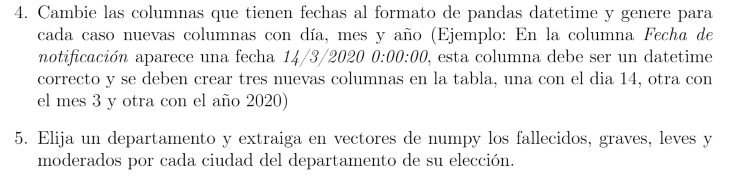

In [9]:
# Convertir la columna 'Fecha' al tipo de dato datetime
df['Fecha de notificación'] = pd.to_datetime(df['Fecha de notificación'], format='%Y-%m-%d %H:%M:%S')

# Crear nuevas columnas para el Día, Mes y Año
df['Día'] = df['Fecha de notificación'].dt.day
df['Mes'] = df['Fecha de notificación'].dt.month
df['Año'] = df['Fecha de notificación'].dt.year

# Eliminar la columna 'Fecha' original si ya no la necesitas
df.drop(columns=['Fecha de notificación'], inplace=True)
df.head(15)


,fecha reporte web,ID de caso,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,...,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico,Día,Mes,Año
0,2020-12-24 00:00:00,1556979,76,VALLE,76001,CALI,67,1,F,Comunitaria,...,2020-12-21 00:00:00,0,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,0,22,12,2020
1,2020-11-08 00:00:00,1137429,5,ANTIOQUIA,5266,ENVIGADO,37,1,F,Comunitaria,...,2020-10-31 00:00:00,0,2020-11-06 00:00:00,2021-04-25 00:00:00,PCR,6.0,0,5,11,2020
2,2020-11-08 00:00:00,1137430,68,SANTANDER,68001,BUCARAMANGA,77,1,M,Comunitaria,...,2020-10-31 00:00:00,0,2020-11-06 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,0,31,10,2020
3,2020-11-08 00:00:00,1137431,54,NORTE SANTANDER,54001,CUCUTA,52,1,M,Comunitaria,...,2020-10-31 00:00:00,0,2020-11-07 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,0,4,11,2020
4,2020-11-08 00:00:00,1137432,17,CALDAS,17001,MANIZALES,46,1,F,Comunitaria,...,2020-10-31 00:00:00,0,2020-11-06 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,0,6,11,2020
5,2020-11-08 00:00:00,1137434,11,BOGOTA,11001,BOGOTA,81,1,F,Relacionado,...,2020-10-31 00:00:00,2020-11-11 00:00:00,2020-11-07 00:00:00,0,NaN,6.0,0,5,11,2020
6,2020-11-08 00:00:00,1137435,25,CUNDINAMARCA,25320,GUADUAS,39,1,M,Relacionado,...,2020-10-31 00:00:00,0,2020-11-08 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,0,31,10,2020
7,2020-11-08 00:00:00,1137437,5,ANTIOQUIA,5360,ITAGUI,36,1,F,Comunitaria,...,2020-10-31 00:00:00,0,2020-11-04 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,0,3,11,2020
8,2020-11-08 00:00:00,1137438,18,CAQUETA,18001,FLORENCIA,42,1,M,Comunitaria,...,2020-10-22 00:00:00,0,2020-11-04 00:00:00,2021-03-10 00:00:00,Tiempo,6.0,0,5,11,2020
9,2020-11-08 00:00:00,1137439,76,VALLE,76147,CARTAGO,56,1,F,Comunitaria,...,2020-10-31 00:00:00,0,2020-11-05 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,0,5,11,2020


In [164]:
df.iloc[: , 15] # necesito esta columna para saber donde estan los datos, ya que estan en 'estado' 
#resultados = df[df['Estado'].str.contains("leve", case=False, na=False)]

# Imprimir los resultados
#print(resultados)

0          Recuperado
1          Recuperado
2          Recuperado
3           Fallecido
4          Recuperado
              ...    
6384004    Recuperado
6384005    Recuperado
6384006    Recuperado
6384007    Recuperado
6384008    Recuperado
Name: Recuperado, Length: 6384009, dtype: object

In [121]:
columna_numpy = df['Estado'].to_numpy()
print(columna_numpy)
print(columna_numpy.shape)

['Leve' 'Leve' 'Leve' ... 'Leve' 'Leve' 'Leve']
(6384009,)


In [122]:
leve_armenia = df[(df['Nombre municipio'] == 'ARMENIA') & (df['Estado'] == 'Leve')]

# Imprimir el DataFrame resultante
# Seleccionar solo la columna 'Fallecido'
columna_leve = leve_armenia['Estado']

# Convertir la columna en una matriz de NumPy
matriz_leve = columna_leve.to_numpy()
print(matriz_leve.shape)
print(matriz_leve)


(52590,)
['Leve' 'Leve' 'Leve' ... 'Leve' 'Leve' 'Leve']


In [123]:
fallecido_armenia = df[(df['Nombre municipio'] == 'ARMENIA') & (df['Estado'] == 'Fallecido')]

# Imprimir el DataFrame resultante
# Seleccionar solo la columna 'Fallecido'
columna_fallecido = fallecido_armenia['Estado']

# Convertir la columna en una matriz de NumPy
matriz_fallecido = columna_fallecido.to_numpy()
print(matriz_fallecido.shape)
print(matriz_fallecido)


(1438,)
['Fallecido' 'Fallecido' 'Fallecido' ... 'Fallecido' 'Fallecido'
 'Fallecido']


In [167]:
grave_armenia = df[(df['Nombre municipio'] == 'ARMENIA') & (df['Estado'] == 'Moderado')]

# Imprimir el DataFrame resultante
# Seleccionar solo la columna 'Fallecido'
columna_grave = grave_armenia['Estado']

# Convertir la columna en una matriz de NumPy
matriz_grave = columna_grave.to_numpy()
print(matriz_grave.shape)
print(matriz_grave)


(1,)
['Moderado']


In [129]:
cantidad_de_datos_de_armenia = len(df[df['Nombre municipio'] == 'ARMENIA'])

print(f"Datos de Armenia: {cantidad_de_datos_de_armenia}")

Datos de Armenia: 55603


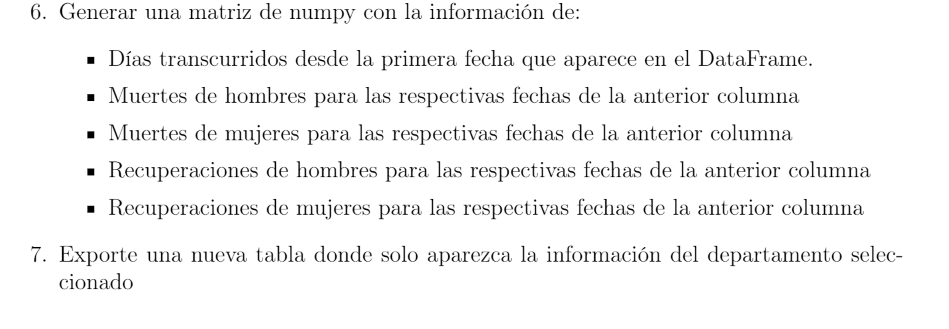

In [143]:
# Asegurarse de que la columna de fechas esté en el formato datetime
df['fecha reporte web'] = pd.to_datetime(df['fecha reporte web'])

# Encontrar la fecha más temprana en la columna
fecha_inicial = df['fecha reporte web'].min()

# Calcular la diferencia de días entre cada fecha y la fecha más temprana
dias_transcurridos = (df['fecha reporte web'] - fecha_inicial).dt.days

# Almacenar los valores en una matriz de NumPy
matriz_dias_transcurridos = dias_transcurridos.to_numpy()
print(matriz_dias_transcurridos)

# 'matriz_dias_transcurridos' ahora contiene los días transcurridos desde la primera fecha

[293 293 293 ... 597 597 597]


In [150]:
# Asegurarse de que la columna de fechas esté en el formato datetime
df['fecha reporte web'] = pd.to_datetime(df['fecha reporte web'])

# Calcular la columna de días transcurridos (como se mencionó anteriormente)

# Filtrar los registros de hombres que murieron
muertes_hombres = df[(df['Sexo'] == 'M') & (df['Estado'] == 'Fallecido')]

# Contar el número de muertes de hombres para cada fecha de la columna de días transcurridos
muertes_hombres_por_dia = muertes_hombres['fecha reporte web'].value_counts().sort_index()

matriz_muertes_hombres = muertes_hombres_por_dia.to_numpy()
print(matriz_muertes_hombres)

[  1   2   3   4   1   4   2   2   4   3   6   3   5   9   6   6   5  12
  14  12  17   6   2   6   8   5   6   3   8   3   5   8   9  10   2   3
  15   8  11  12  15   5   5  26   8   8  19   7  17  15  11  16  22   8
  16  15  13  22  23  16  20  29  25   9  16  20  31  27  49  23  26  44
  32  58  29  34  46  43  41  39  31  47  81  72  59  60  88 107  80  88
 101  51  81  99 116 106 122 109  72  79 136 125 135 116 112  83 121 152
 189 147 134 129  93 142 181 227 174 192 158 171 176 230 210 217 185 223
 229 257 258 238 195 211 255 217 172 262 234 177 191 210 234 232 241 270
 226 201 191 137 194 282 240 192 217 183 174 275 194 198 187 155 141 140
 158 160 162 146 124 122 100 120 128 138 116 109 130  70 114 129 121 109
 118 116  68 117 125 143 113 116 115  68  68 111  92 103 104  88  98 110
 110 157 111 119 107  98  62 148 118 154 109 109 112 145 131 127 111 124
 106 113 111 141 162 124 108 113 105  72 138 138 146 116 103  98  77 116
 124 113 122 138  69  87 124  95 111 101 112  96 11

In [151]:
# Asegurarse de que la columna de fechas esté en el formato datetime
df['fecha reporte web'] = pd.to_datetime(df['fecha reporte web'])

# Calcular la columna de días transcurridos (como se mencionó anteriormente)

# Filtrar los registros de hombres que murieron
muertes_mujeres = df[(df['Sexo'] == 'F') & (df['Estado'] == 'Fallecido')]

# Contar el número de muertes de hombres para cada fecha de la columna de días transcurridos
muertes_mujeres_por_dia = muertes_mujeres['fecha reporte web'].value_counts().sort_index()

matriz_muertes_mujeres = muertes_mujeres_por_dia.to_numpy()
print(matriz_muertes_mujeres)

[  1   1   1   1   1   3   1   5   3   6   1   5   2   1   5   4  10   4
   6  10   1   4   7   2   4   5   3   1   5   8   5   3   4   1   8   7
  12   6   5   7   3  18   2   4  12  12  13   9  15  13  10  13  15   4
   7   8  11   7  13  21  17   8   8  10  22  15  35   9   8  37  23  22
  30  22  23  34  14  27  25  36  24  37  49  25  48  84  64  43  54  31
  52  63  55  55  63  51  62  31  77  78  67  68  50  47  67  67 105  78
  74  73  61  88  82 104  87 113  80  96 105 136  99 136  97 106 108 138
 129 103 114 124 137 130  90 138 139 101  93 107 127 142 125 159 126 116
 119  93 108 120 143 120 122 112 101 139  87 113  97 101  67  72  79  94
  87 107  83  58  49  68  79  82  81  61  64  50  65  57  94  56  72  64
  38  61  62  76  86  64  48  48  39  60  59  54  62  62  50  63  79  96
  60  65  49  49  30  67  65  92  53  43  44 101  58  84  61  64  47  79
  67  65  92  89  72  65  83  50  79  90  78  75  43  50  50  57  69  64
  74  71  49  52  81  62  81  64  61  60  64  63  7

In [165]:
# Asegurarse de que la columna de fechas esté en el formato datetime
df['fecha reporte web'] = pd.to_datetime(df['fecha reporte web'])

# Calcular la columna de días transcurridos (como se mencionó anteriormente)

# Filtrar los registros de hombres que murieron
recuperados_hombres = df[(df['Sexo'] == 'M') & (df['Recuperado'] == 'Recuperado')]

# Contar el número de muertes de hombres para cada fecha de la columna de días transcurridos
recuperados_hombres_por_dia = recuperados_hombres['fecha reporte web'].value_counts().sort_index()

matriz_recuperados_hombres = recuperados_hombres_por_dia.to_numpy()
print(matriz_recuperados_hombres)

[    1     2     3    11     6    11    13     9    14    22    14    17
    32    54    24     8    25    37    43    46    57    61    40    43
    66    36    39    58   154    78   109    97    35    50    66    57
    55    89    86    89    90    73   102   102   157   135   140   105
   223   114   118   305   146   271   156   366   199   289   335   237
   294   320   356   305   365   302   326   286   393   319   369   312
   432   520   549   501   528   570   589   680   771   552   600   617
   705   854   793   739   597   683   677   885   829   885  1020  1267
  1077  1066  1077  1613  1423  1170  1604  1357  1095  1689  1844  1921
  2088  1586  1602  1373  2100  2057  1655  2021  1873  1593  2100  2032
  2672  3509  2227  2503  1873  2854  2648  4091  4617  4284  3275  3297
  3595  3618  4171  3469  3763  3897  4054  5051  4230  4834  4642  5105
  5465  4930  3560  5088  5570  4658  4752  5152  4828  5959  5520  5322
  5487  5434  5527  3870  5691  5995  5518  3918  5

In [166]:
# Asegurarse de que la columna de fechas esté en el formato datetime
df['fecha reporte web'] = pd.to_datetime(df['fecha reporte web'])

# Calcular la columna de días transcurridos (como se mencionó anteriormente)

# Filtrar los registros de hombres que murieron
recuperados_mujeres = df[(df['Sexo'] == 'F') & (df['Recuperado'] == 'Recuperado')]

# Contar el número de muertes de hombres para cada fecha de la columna de días transcurridos
recuperados_mujeres_por_dia = recuperados_mujeres['fecha reporte web'].value_counts().sort_index()

matriz_recuperados_mujeres = recuperados_mujeres_por_dia.to_numpy()
print(matriz_recuperados_mujeres)

[    1     1     4     5     2     7    10     2    12     3    12    23
    19    11    37    47    36     1    20    27    48    40    44    86
    52    52    63    36    44    62   169    73   124   111    26    25
    53    54    63   107    86    79    82    89    86    75   132   112
    90   107   108   132   154   174   109   136   142   223   135   194
   225   188   241   205   272   321   282   281   364   325   302   289
   349   308   334   470   404   287   462   495   615   595   688   560
   473   636   757   823   649   586   535   717   619   644   640   664
   755   804   925   707   897  1352  1471  1046  1243  1081  1147  1671
  1448  1734  1857  1411  1528  1304  1824  1820  1520  1662  1668  1430
  1897  1874  2348  3030  2125  2346  1782  2512  2326  3569  4005  3938
  3021  3130  3119  3359  3426  3302  3178  3909  3690  4776  4001  4728
  4487  5192  5548  4887  3270  5195  5976  4503  4588  5084  4903  6422
  6111  5472  5413  5774  5755  4183  6425  6575  5